# Importando as bibliotecas

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importando os datasets </br>
- Dados clinicos
- Dados pacientes
- Estados regiao

In [90]:
# Dados Clinicos
try:
  df_dados_clinicos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PÓS GRADUAÇÃO/Modulo 1 - Bootcamp Ciência de dados /Data/dados_clinicos.csv', sep='|')
except FileExistsError:
    print('Arquivo não encontrado')
except Exception as e:
    print(f'Erro: {e}')

df_dados_clinicos.head()

,id_cliente,peso,colesterol,genero
0,1,152.7,203.9,Masculino
1,2,184.8,233.8,Masculino
2,3,152.1,210.4,Masculino
3,4,139.8,196.8,Masculino
4,5,182.4,215.8,Feminino


In [91]:
# Dados Pacientes

try:
  df_dados_pacientes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PÓS GRADUAÇÃO/Modulo 1 - Bootcamp Ciência de dados /Data/dados_pacientes.csv', sep=';')
except FileExistsError:
    print('Arquivo não encontrado')
except Exception as e:
    print(f'Erro: {e}')

df_dados_pacientes.head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430


In [92]:
# Estado Região

try:
  df_estado_regiao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PÓS GRADUAÇÃO/Modulo 1 - Bootcamp Ciência de dados /Data/estado_regiao.csv', sep=';', encoding='latin1')
except FileExistsError:
    print('Arquivo não encontrado')
except Exception as e:
    print(f'Erro: {e}')

df_estado_regiao.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


# Verificando dados duplicados e correção

In [93]:
df_dados_pacientes.duplicated().sum()

85

In [94]:
df_dados_clinicos.duplicated().sum()

301

In [95]:
df_estado_regiao.duplicated().sum()

9

## Correção dos dados duplicados

In [96]:
df_dados_pacientes.drop_duplicates(inplace=True)

In [97]:
df_dados_pacientes.duplicated().sum()

0

In [98]:
df_dados_clinicos.drop_duplicates(inplace=True)

In [99]:
df_dados_pacientes.duplicated().sum()

0

In [100]:
df_estado_regiao.drop_duplicates(inplace=True)

In [101]:
df_estado_regiao.duplicated().sum()

0

# Verificando dados Nulos e correção

In [102]:
df_dados_pacientes.isnull().sum()

,0
id_cliente,0
idade,0
classe_trabalho,387
escolaridade,0
id_estado,0
estado_civil,0
raca,0
qtde_filhos,10
salario,0


In [103]:
df_dados_clinicos.isnull().sum()

,0
id_cliente,0
peso,13
colesterol,0
genero,10


In [104]:
df_estado_regiao.isnull().sum()

,0
id_estado,0
sigla,0
estado,0
regiao,0
pais,0


## Corrigindo os dados nulos do dataset df_dados_pacientes
- Classe de trabalho utilizar a moda
- Quantidade de filhos utilizar mediana



### Classe de trabalho

In [105]:
# Pegando o index dos nulos para conferencia
filtro = df_dados_pacientes['classe_trabalho'].isna()
index_ausentes_classe_trabalho = df_dados_pacientes[filtro].index
df_dados_pacientes.loc[index_ausentes_classe_trabalho].head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
61,62,32,NaN,Ensino Fundamental Incompleto,12,União Estável,Branco,4.0,1100
69,70,25,NaN,Ensino Médio Completo,1,Solteiro,Branco,3.0,3450
127,128,35,NaN,Ensino Médio Incompleto,1,Casado,Amarelo,4.0,1100
148,149,43,NaN,Ensino Médio Completo,21,Divorciado,Branco,0.0,2490
153,154,52,NaN,Ensino Médio Incompleto,18,Divorciado,Branco,1.0,1100


In [106]:
moda_classe_trabalho = df_dados_pacientes['classe_trabalho'].mode()[0]
print(f'Moda da classe de trabalho: {moda_classe_trabalho}')
df_dados_pacientes['classe_trabalho'] = df_dados_pacientes['classe_trabalho'].fillna(value = moda_classe_trabalho)


Moda da classe de trabalho: Funcionário Setor Privado


In [107]:
df_dados_pacientes.loc[index_ausentes_classe_trabalho].head()


,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
61,62,32,Funcionário Setor Privado,Ensino Fundamental Incompleto,12,União Estável,Branco,4.0,1100
69,70,25,Funcionário Setor Privado,Ensino Médio Completo,1,Solteiro,Branco,3.0,3450
127,128,35,Funcionário Setor Privado,Ensino Médio Incompleto,1,Casado,Amarelo,4.0,1100
148,149,43,Funcionário Setor Privado,Ensino Médio Completo,21,Divorciado,Branco,0.0,2490
153,154,52,Funcionário Setor Privado,Ensino Médio Incompleto,18,Divorciado,Branco,1.0,1100


### Quantidade de filhos


In [108]:
# Pegando o index dos dados ausentes para conferência
filtro = df_dados_pacientes['qtde_filhos'].isna()
index_ausentes_qtde_filhos = df_dados_pacientes[filtro].index
df_dados_pacientes.loc[index_ausentes_qtde_filhos].head()


,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
12,13,23,Funcionário Setor Privado,Pós-Graduado,22,Solteiro,Branco,NaN,5316
20,21,40,Funcionário Setor Privado,Doutorado,8,Casado,Branco,NaN,12535
189,190,38,Funcionário Setor Privado,Ensino Médio Completo,27,Divorciado,Negro,NaN,2369
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,NaN,10671
295,296,37,MEI,Ensino Médio Completo,18,Divorciado,Branco,NaN,4300


In [109]:
mediana_qtde_filhos = df_dados_pacientes['qtde_filhos'].median()
print(f'Mediana da quantidade de filhos: {mediana_qtde_filhos}')
df_dados_pacientes['qtde_filhos'] = df_dados_pacientes['qtde_filhos'].fillna(value = mediana_qtde_filhos)

Mediana da quantidade de filhos: 2.0


In [110]:
df_dados_pacientes.loc[index_ausentes_qtde_filhos].head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
12,13,23,Funcionário Setor Privado,Pós-Graduado,22,Solteiro,Branco,2.0,5316
20,21,40,Funcionário Setor Privado,Doutorado,8,Casado,Branco,2.0,12535
189,190,38,Funcionário Setor Privado,Ensino Médio Completo,27,Divorciado,Negro,2.0,2369
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,2.0,10671
295,296,37,MEI,Ensino Médio Completo,18,Divorciado,Branco,2.0,4300


## Corrigindo os dados nulos do dataset df_dados_clinicos
- Genêro utilizar a moda
- Peso utilizar mediana

### Genero

In [111]:
# Pegando o index das linhas nulas para conferência
filtro = df_dados_clinicos['genero'].isna()
index_ausentes_genero = df_dados_clinicos[filtro].index
df_dados_clinicos.loc[index_ausentes_genero].head()

,id_cliente,peso,colesterol,genero
10227,9927,177.6,220.3,NaN
10228,9928,149.3,199.3,NaN
10233,9933,65.3,132.8,NaN
10234,9934,180.6,214.1,NaN
10237,9937,103.6,160.8,NaN


In [112]:
moda = df_dados_clinicos['genero'].mode()[0]
print(f'Moda do genero: {moda}')
df_dados_clinicos['genero'] = df_dados_clinicos['genero'].fillna(value = moda)

Moda do genero: Feminino


In [113]:
df_dados_clinicos.loc[index_ausentes_genero].head()

,id_cliente,peso,colesterol,genero
10227,9927,177.6,220.3,Feminino
10228,9928,149.3,199.3,Feminino
10233,9933,65.3,132.8,Feminino
10234,9934,180.6,214.1,Feminino
10237,9937,103.6,160.8,Feminino


### Peso

In [114]:
# pegando o index das linhas que estão com a coluna peso ausentes para conferência
filtro = df_dados_clinicos['peso'].isna()
index_ausentes_peso = df_dados_clinicos[filtro].index
df_dados_clinicos.loc[index_ausentes_peso].head()

,id_cliente,peso,colesterol,genero
10224,9924,NaN,201.1,Feminino
10225,9925,NaN,225.2,Masculino
10230,9930,NaN,134.9,Feminino
10231,9931,NaN,237.5,Feminino
10243,9943,NaN,219.3,Feminino


In [115]:
mediana_peso = df_dados_clinicos['peso'].median()
print(f'Mediana do peso: {mediana_peso}')
df_dados_clinicos['peso'] = df_dados_clinicos['peso'].fillna(value = mediana_peso)

Mediana do peso: 124.6


In [116]:
df_dados_clinicos.loc[index_ausentes_peso].head()

,id_cliente,peso,colesterol,genero
10224,9924,124.6,201.1,Feminino
10225,9925,124.6,225.2,Masculino
10230,9930,124.6,134.9,Feminino
10231,9931,124.6,237.5,Feminino
10243,9943,124.6,219.3,Feminino


# Integrando os dataset com o Merge do Pandas



In [117]:
df_dados_pacientes.head(2)

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923


In [118]:
df_dados_clinicos.head(2)

,id_cliente,peso,colesterol,genero
0,1,152.7,203.9,Masculino
1,2,184.8,233.8,Masculino


In [119]:
df = pd.merge(df_dados_pacientes, df_dados_clinicos, on='id_cliente', how='inner')
df.head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,peso,colesterol,genero
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,152.7,203.9,Masculino
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,184.8,233.8,Masculino
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,152.1,210.4,Masculino
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,139.8,196.8,Masculino
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,182.4,215.8,Feminino


In [120]:
df_estado_regiao.head(2)

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil


In [121]:
df = pd.merge(df, df_estado_regiao, on='id_estado', how='inner')
df.head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,peso,colesterol,genero,sigla,estado,regiao,pais
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,152.7,203.9,Masculino,AL,Alagoas,Nordeste,Brasil
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,184.8,233.8,Masculino,SC,Santa Catarina,Sul,Brasil
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,152.1,210.4,Masculino,AM,Amazonas,Norte,Brasil
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,139.8,196.8,Masculino,SC,Santa Catarina,Sul,Brasil
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,182.4,215.8,Feminino,PB,Paraíba,Nordeste,Brasil


# Questões:


## Crie um histograma das idades de todas as pessoas que residem no estado de São Paulo e trabalham no setor privado. Utilize 20 barras para representar graficamente os dados.

In [122]:
df['classe_trabalho'].value_counts()

,count
classe_trabalho,
Funcionário Setor Privado,5769
Autônomo,588
Empresário,496
Servidor Público,299
MEI,275
Aposentado,267
Funcionário Público,216
Menor Aprendiz,85
Desempregado,3


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

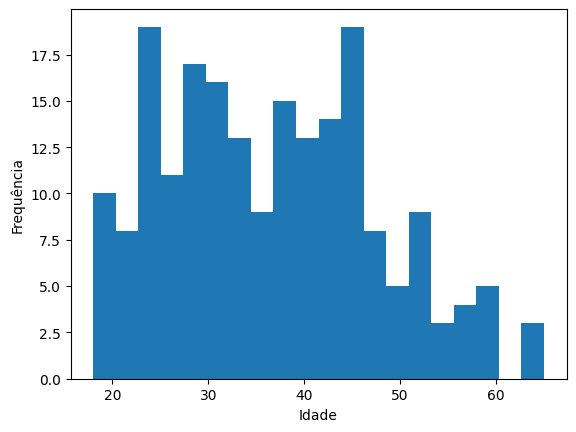

In [123]:
filtro = (df['estado'] == 'São Paulo') & (df['classe_trabalho'] == 'Funcionário Setor Privado')
df_sp_setor_privado = df.loc[filtro]
plt.hist(df_sp_setor_privado['idade'], bins=20)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt

## Crie um gráfico de barras que represente a média salarial de todas as pessoas, agrupadas por raça.


       raca      salario
0   Amarelo  2309.410959
1    Branco  3187.203253
2  Indígena  3150.275000
3     Negro  2961.061538
4     Pardo  3601.735537


<Axes: xlabel='raca', ylabel='salario'>

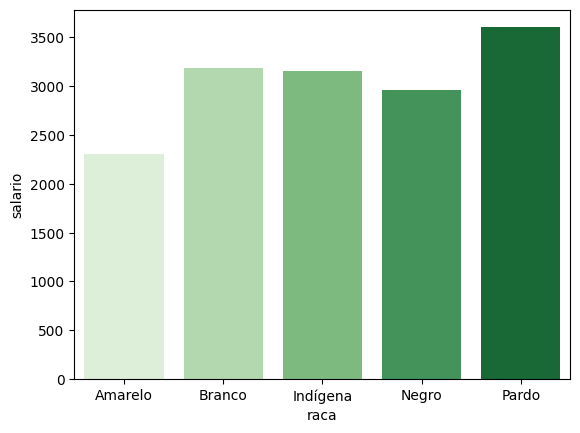

In [124]:
dados = df.groupby('raca')['salario'].mean().reset_index()
print(dados)
sns.barplot(data=dados, x='raca', y='salario', palette='Greens', hue='raca')

## Crie um gráfico de barras para visualizar a distribuição do número de pessoas residentes em Minas Gerais, agrupadas por estado civil e raça

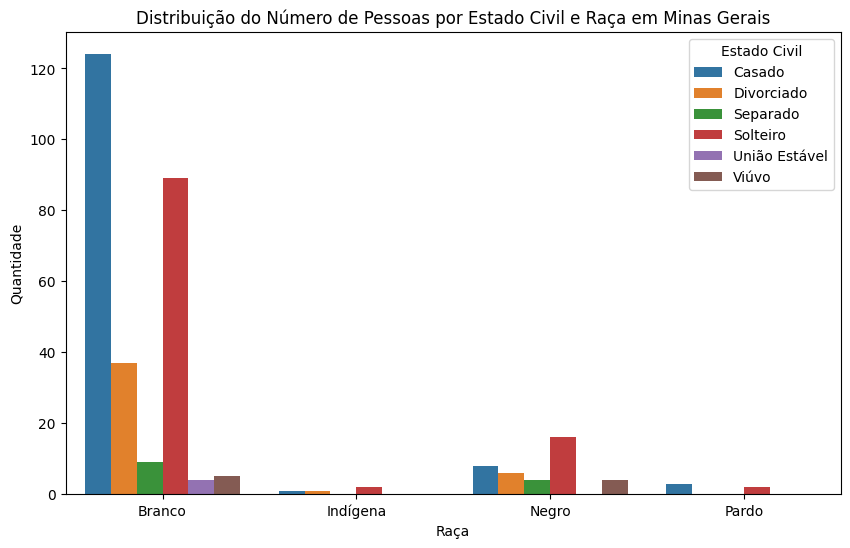

In [125]:
filtro = df['sigla'] == 'MG'
grouped = df.loc[filtro].groupby(['estado_civil', 'raca', 'sigla'])
dados = grouped.agg( qtd = ('escolaridade', 'count')).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='raca', y='qtd', hue='estado_civil', data=dados)
plt.xlabel('Raça')
plt.ylabel('Quantidade')
plt.title('Distribuição do Número de Pessoas por Estado Civil e Raça em Minas Gerais')
plt.legend(title='Estado Civil')
plt.show()

## Qual é a média e o desvio padrão do colesterol das pessoas que têm peso superior a 120 kg e residem na região Sul do Brasil?

In [126]:
filtro = (df['peso'] > 120) & (df['regiao'] == 'Sul')
df_peso_maior_120_sul = df.loc[filtro]
media = df_peso_maior_120_sul['colesterol'].mean()
desvio_padrao = df_peso_maior_120_sul['colesterol'].std()
print(f'Média: {media}')
print(f'Desvio padrão: {desvio_padrao}')

Média: 206.95538461538462
Desvio padrão: 21.890615348256286


## Crie um gráfico de dispersão com as variáveis peso no eixo x e colesterol no eixo y para as pessoas na região Sudeste agrupados por gênero.

<Axes: xlabel='peso', ylabel='colesterol'>

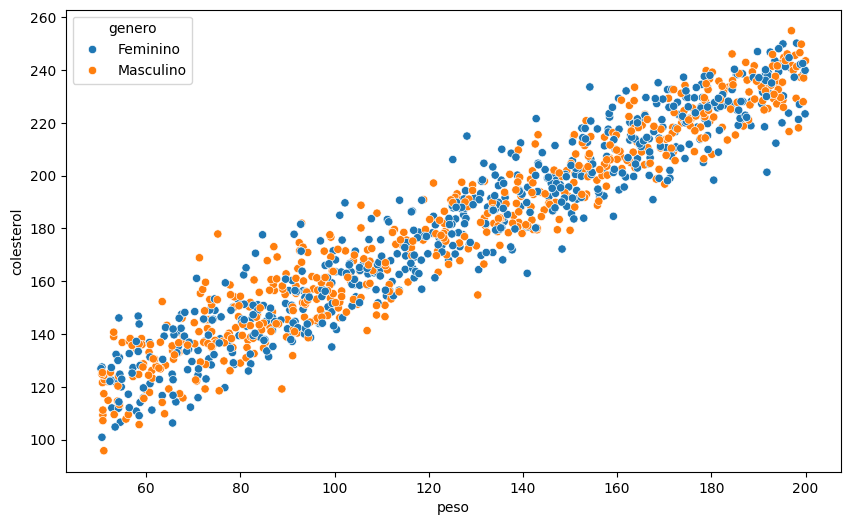

In [127]:
filtro = (df['regiao'] == 'Sudeste')
df_sudeste = df.loc[filtro]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sudeste, x='peso', y='colesterol', hue='genero')

## Qual é a classe de trabalho com o maior número de pessoas e qual é o número correspondente na base de dados?

In [128]:
df['classe_trabalho'].value_counts()

,count
classe_trabalho,
Funcionário Setor Privado,5769
Autônomo,588
Empresário,496
Servidor Público,299
MEI,275
Aposentado,267
Funcionário Público,216
Menor Aprendiz,85
Desempregado,3


## Qual é a classe de trabalho que apresenta a maior média de salários e qual é o valor associado para as pessoas do estado de Pernambuco?

In [129]:
filtro = df['estado'] == 'Pernambuco'
dados = df.loc[filtro]
dados.groupby('classe_trabalho')['salario'].mean().sort_values(ascending=False).round(2)

,salario
classe_trabalho,
Empresário,11871.60
Servidor Público,6381.50
Funcionário Público,6365.62
Aposentado,4139.30
MEI,4098.12
Autônomo,2444.69
Funcionário Setor Privado,2347.57
Menor Aprendiz,1100.00


## Crie um gráfico de boxplot para os salários agrupados por classe de trabalho

<Axes: xlabel='salario', ylabel='classe_trabalho'>

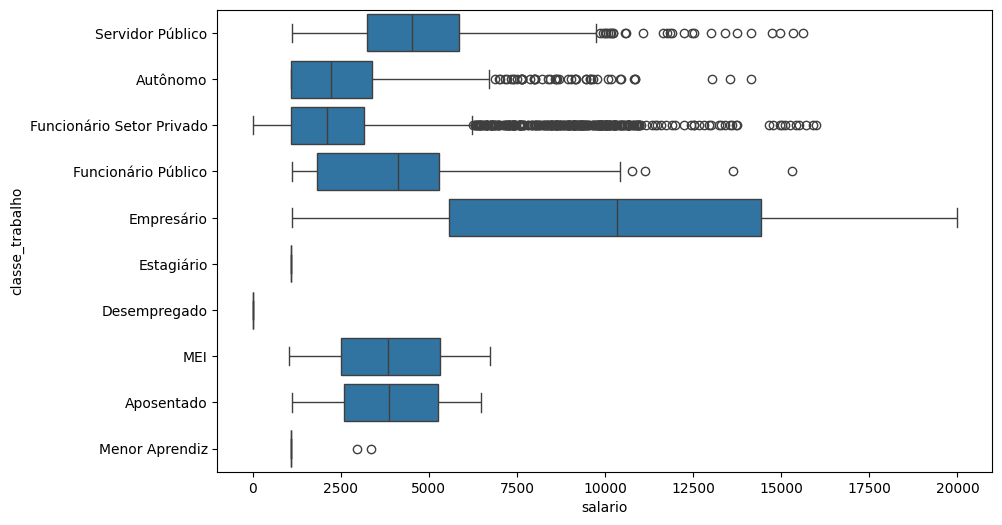

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='salario', y='classe_trabalho', data=df)

## Crie um gráfico de boxplot para as idades agrupados por raça para todas as pessoas que são da região sudeste.

<Axes: xlabel='idade', ylabel='raca'>

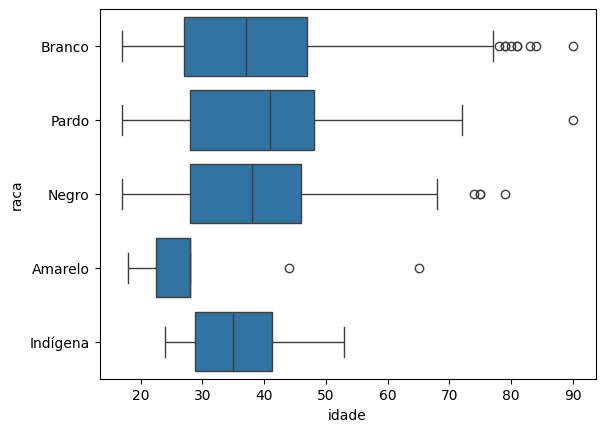

In [131]:
filtro = df['regiao'] == 'Sudeste'
df_sudeste = df[filtro]
sns.boxplot(x='idade', y='raca', data=df_sudeste)

## Qual é a média salarial das pessoas casadas que possuem ensino superior completo e trabalham como Funcionário de Setor Privado?

In [139]:
filtro = (df['estado_civil'] == 'Casado') & (df['classe_trabalho'] == 'Funcionário Setor Privado') & (df['escolaridade'] == 'Superior Completo')
df_filtred = df[filtro]
media_salario = df_filtred['salario'].mean()
print(f'Média salarial pessoas casadas com ensino superior completo e trabalham como Funcionário Setor Privado {media_salario}')

Média salarial pessoas casadas com ensino superior completo e trabalham como Funcionário Setor Privado 11025.0


## Qual estado civil possui a menor quantidade filhos e qual é esse número? Some a quantidade de filhos

In [143]:
df.groupby('estado_civil')['qtde_filhos'].sum().sort_values()

,qtde_filhos
estado_civil,
União Estável,284.0
Viúvo,583.0
Separado,669.0
Divorciado,2796.0
Solteiro,5713.0
Casado,9192.0
